# Horizon tiling of the sky

Computation of the angular size of the horizon at a given redshift z, projected on the sky.

In [1]:
# Useful imports
import numpy as np
import matplotlib.pyplot as plt

import camb

In [2]:
# Set up the parameters for CAMB

# Set up the parameters for the fiducial cosmology
#pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06,  
#                       As=2e-9, ns=0.965, halofit_version='mead', lmax=3000)

pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06);

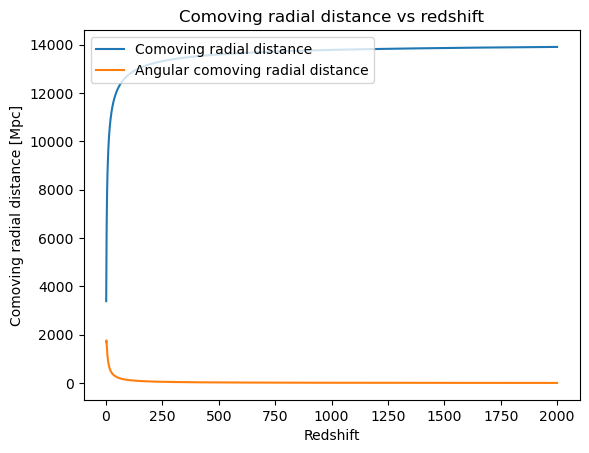

In [3]:
# Computing comoving distance and angular comoving distance for the fiducial cosmology

#results1 = camb.get_results(pars) # Get the results for the fiducial cosmology
results = camb.get_background(pars) # Get the background results

# Redshift values
n_points = 2000# 
z = np.linspace(1, 2000, n_points) 

 # Comoving radial distance
chi = results.comoving_radial_distance(z)

# Angular comoving radial distance 
ang_chi = chi / (1 + z)

# Plot
plt.plot(z, chi, label='Comoving radial distance')
plt.plot(z, ang_chi, label='Angular comoving radial distance')  
plt.legend(loc='upper left')
plt.xlabel('Redshift')
plt.ylabel('Comoving radial distance [Mpc]')
plt.title('Comoving radial distance vs redshift')
#plt.xlim(0, 2)

plt.show()



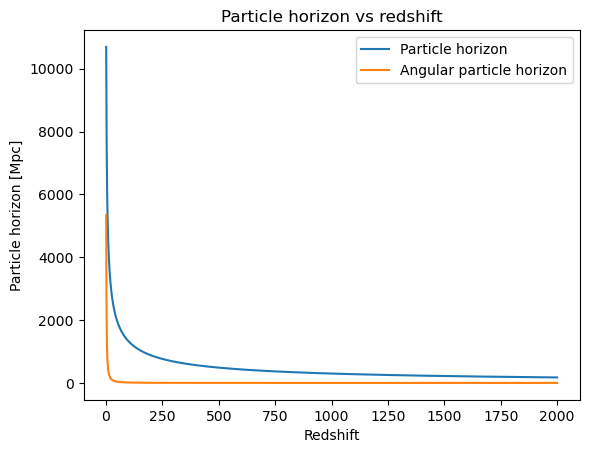

In [4]:
# Computing the particle horizon for the fiducial cosmology at different redshifts

# Array of infinite redshifts
z_inf = np.full(n_points, np.inf)

# Computing the particle horizon from infinity to redshift z
ph = results.comoving_radial_distance(z_inf) - results.comoving_radial_distance(z)

#Computing the angular particle horizon 
ang_ph = ph / (1 + z)

# Reshaffling the array to have the particle horizon at redshift z in the same order as z
#ph = ph[::-1]

# Plot
plt.plot(z, ph, label='Particle horizon')
plt.plot(z, ang_ph, label='Angular particle horizon')
plt.legend(loc='best')
plt.xlabel('Redshift')
plt.ylabel('Particle horizon [Mpc]')
plt.title('Particle horizon vs redshift')
#plt.xlim(0, 2)
plt.show()

In [5]:
# Consistency check with professor Branchini's results (L12 - inflazione1, slide 5)
print('Consistency check with professor Branchini results- L12 - inflazione1, slide 5')
print('The particle horizon at redshift z=1100 is', ph[1100], 'Mpc')
print('The angular particle horizon at redshift z=1100 is', ang_ph[1100], 'Mpc')
print('The comoving radial distance at redshift z=1100 is', chi[1100], 'Mpc')
print('The angular comoving radial distance at redshift z=1100 is', ang_chi[1100], 'Mpc')
print('The results are consistent with the ones in the slides in Mpc.') 

Consistency check with professor Branchini results- L12 - inflazione1, slide 5
The particle horizon at redshift z=1100 is 277.57581959193885 Mpc
The angular particle horizon at redshift z=1100 is 0.2518836838402349 Mpc
The comoving radial distance at redshift z=1100 is 13806.746021544166 Mpc
The angular comoving radial distance at redshift z=1100 is 12.528807642054597 Mpc
The results are consistent with the ones in the slides in Mpc.


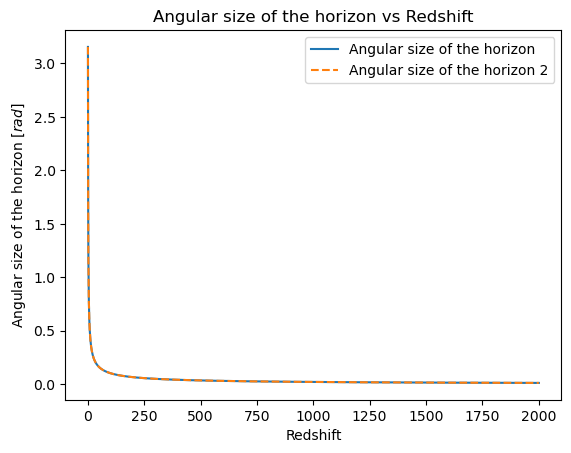

In [6]:
# Computing the angular size of the horizon at different redshifts
theta  = ph / chi # Angular size of the horizon in radians 

# Consistency check with angular diameter distance
theta2 = ang_ph / ang_chi # Angular size of the horizon in radians
 
# Plot
plt.plot(z, theta, label='Angular size of the horizon')
plt.plot(z, theta2, label='Angular size of the horizon 2', linestyle='--')
plt.legend(loc='best')
plt.xlabel('Redshift')
plt.ylabel('Angular size of the horizon [$rad$]')
plt.title('Angular size of the horizon vs Redshift')
#plt.xlim(1075, 1125)
#plt.ylim(0, 0.05)
plt.show()

In [7]:
# Theta at z = 1100
theta_1100 = theta[np.where(z == 1100)]
theta2_1100 = theta2[np.where(z == 1100)]
print('Angular size of the horizon at z = 1100: ', theta_1100, 'rad')
print('Angular size of the horizon at z = 1100: ', theta2_1100, 'rad')
print('Angular size of the horizon at z = 1100 in degrees: ', np.degrees(theta_1100))
print('Angular size of the horizon at z = 1100 in degrees: ', np.degrees(theta2_1100))


Angular size of the horizon at z = 1100:  [0.02011826] rad
Angular size of the horizon at z = 1100:  [0.02011826] rad
Angular size of the horizon at z = 1100 in degrees:  [1.15269128]
Angular size of the horizon at z = 1100 in degrees:  [1.15269128]


In [8]:
# Checking where z = 1100
z[1099]

1100.0

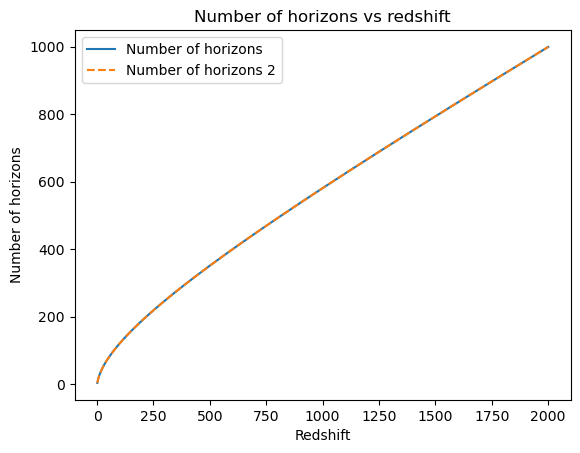

In [9]:
# Counting how many horizon sizes are in the observable universe
theta_obs = 4 * np.pi
n_horizons = theta_obs / theta
n_horizons2 = theta_obs / theta2

# Plot
plt.plot(z, n_horizons, label='Number of horizons')
plt.plot(z, n_horizons2, label='Number of horizons 2', linestyle='--')
plt.legend(loc='best')
plt.xlabel('Redshift')
plt.ylabel('Number of horizons')
plt.title('Number of horizons vs redshift')
#plt.xlim(1075, 1125)
#plt.ylim(0, 5)
plt.show()


In [10]:
'''
# Counting how many horizon sizes are in the observable universe with sphere packing technique

# The volume of the observable universe seen as a sphere and as a cube
V_obs_sph = 4/3 * np.pi * (chi)**3
V_obs_cub = chi**3

# The volume of the particle horizon at different redshifts
V_horizon = 4/3 * np.pi * (ph)**3

# The number of horizons in the observable universe
n_horizons_sphere = V_obs_sph // V_horizon
n_horizons_cube = V_obs_cub // V_horizon
n_horizons_2 = V_obs_cub // V_horizon

# Checking the packing density to turn out as proposed by Kepler's conjecture of the sphere packing problem in 1611
packing_density = n_horizons_sphere * V_horizon / V_obs_sph
packing_density_cube = n_horizons_cube * V_horizon / V_obs_cub # it should be around 0.74
packing_density_2 = n_horizons_2 * V_horizon / V_obs_cub # it should be around 0.74

# Plot
plt.subplot(2, 1, 1)
plt.plot(z, n_horizons_sphere, label='Number of horizons')
plt.plot(z, n_horizons_cube, label='Number of horizons cube', linestyle='--')
plt.plot(z, n_horizons_2, label='Number of horizons', linestyle='-.')
plt.legend(loc='best')
plt.xlabel('Redshift')
plt.ylabel('Number of horizons')
plt.title('Number of horizons vs redshift')

plt.subplot(2, 1, 2)
plt.plot(z, packing_density, label='Packing density')
plt.plot(z, packing_density_cube, label='Packing density cube', linestyle='--')
plt.plot(z, packing_density_2, label='Packing density', linestyle='-.')
plt.legend(loc='best')
plt.xlabel('Redshift')
plt.ylabel('Packing density')
plt.title('Packing density vs redshift')

plt.tight_layout()
plt.show()
'''


"\n# Counting how many horizon sizes are in the observable universe with sphere packing technique\n\n# The volume of the observable universe seen as a sphere and as a cube\nV_obs_sph = 4/3 * np.pi * (chi)**3\nV_obs_cub = chi**3\n\n# The volume of the particle horizon at different redshifts\nV_horizon = 4/3 * np.pi * (ph)**3\n\n# The number of horizons in the observable universe\nn_horizons_sphere = V_obs_sph // V_horizon\nn_horizons_cube = V_obs_cub // V_horizon\nn_horizons_2 = V_obs_cub // V_horizon\n\n# Checking the packing density to turn out as proposed by Kepler's conjecture of the sphere packing problem in 1611\npacking_density = n_horizons_sphere * V_horizon / V_obs_sph\npacking_density_cube = n_horizons_cube * V_horizon / V_obs_cub # it should be around 0.74\npacking_density_2 = n_horizons_2 * V_horizon / V_obs_cub # it should be around 0.74\n\n# Plot\nplt.subplot(2, 1, 1)\nplt.plot(z, n_horizons_sphere, label='Number of horizons')\nplt.plot(z, n_horizons_cube, label='Number of

In [11]:
'''
# Counting how many horizon sizes are in the observable universe with sphere packing technique

# The volume of the observable universe seen as a cube of side chi
side = chi
V_obs_cub = side**3

# The diameter of the horizon at different redshifts
d_horizon = 2 * ph

# Counting how many horizons sphere are contained per side of the cube
cells_side = side // d_horizon

# The number of horizons in the observable universe
n_horizons_cube = cells_side**3

# Volume of the horizon
V_horizon = 4/3 * np.pi * (ph)**3

# Checking the packing density to turn out as proposed by Kepler's conjecture of the sphere packing problem in 1611
packing_density_cube = n_horizons_cube * V_horizon / V_obs_cub # it should be around 0.74
'''

"\n# Counting how many horizon sizes are in the observable universe with sphere packing technique\n\n# The volume of the observable universe seen as a cube of side chi\nside = chi\nV_obs_cub = side**3\n\n# The diameter of the horizon at different redshifts\nd_horizon = 2 * ph\n\n# Counting how many horizons sphere are contained per side of the cube\ncells_side = side // d_horizon\n\n# The number of horizons in the observable universe\nn_horizons_cube = cells_side**3\n\n# Volume of the horizon\nV_horizon = 4/3 * np.pi * (ph)**3\n\n# Checking the packing density to turn out as proposed by Kepler's conjecture of the sphere packing problem in 1611\npacking_density_cube = n_horizons_cube * V_horizon / V_obs_cub # it should be around 0.74\n"

In [12]:
'''
# Plot
plt.subplot(2, 1, 1)
plt.plot(z, n_horizons, label='Number of horizons')
plt.legend(loc='best')
plt.xlabel('Redshift')
plt.ylabel('Number of horizons')
plt.title('Number of horizons vs redshift')

plt.subplot(2, 1, 2)
plt.plot(z, packing_density_cube, label='Packing density')
plt.legend(loc='best')
plt.xlabel('Redshift')
plt.ylabel('Packing density')
plt.title('Packing density vs redshift')

plt.tight_layout()
plt.show()
'''

"\n# Plot\nplt.subplot(2, 1, 1)\nplt.plot(z, n_horizons, label='Number of horizons')\nplt.legend(loc='best')\nplt.xlabel('Redshift')\nplt.ylabel('Number of horizons')\nplt.title('Number of horizons vs redshift')\n\nplt.subplot(2, 1, 2)\nplt.plot(z, packing_density_cube, label='Packing density')\nplt.legend(loc='best')\nplt.xlabel('Redshift')\nplt.ylabel('Packing density')\nplt.title('Packing density vs redshift')\n\nplt.tight_layout()\nplt.show()\n"

# Counting the horizons with sphere packing

To perform this operation, it is useful to recall some "Physics of Matter" knoledge.
In particular, since the observable Universe will be considered as a cube of side depending on the comoving distance, it is usefull to state the Kepler's conjecture of the sphere packing problem, dating back to 1611:
$$
The \ best \ possible \ packing \ of \ a \ cube \ is \ given \ by \ a \ FCC \ configuration \ leading \ to \ a \ packing \ density: \ \rho\sim0.74 
$$


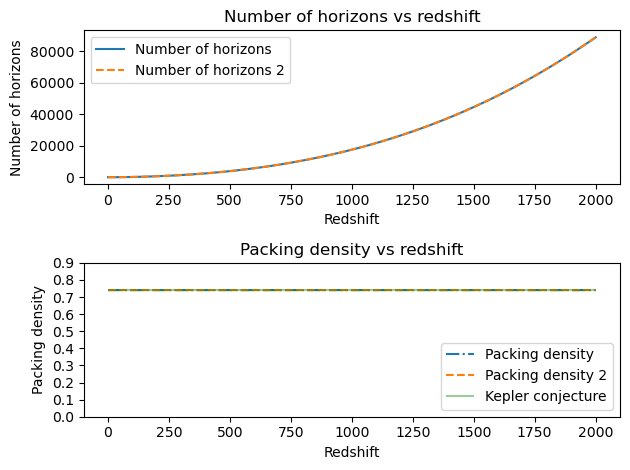

In [13]:
# Counting how many horizon sizes are in the observable universe with sphere packing technique

# The volume of the observable universe seen as a cube of side chi or angular chi
side = chi
V_obs_cub = side**3

ang_side = ang_chi
V_obs_ang_cub = ang_side**3

# The radius of the sphere horizon at different redshifts
r_horizon = ph
r_ang_horizon = ang_ph

# Volume of the horizon
V_horizon = 4/3 * np.pi * (r_horizon)**3
V_ang_horizon = 4/3 * np.pi * (r_ang_horizon)**3

# Side of the unitary FCC cell (2 * sqrt(2) * radius_sphere)
side_cell = 2 * np.sqrt(2) * r_horizon
side_ang_cell = 2 * np.sqrt(2) * r_ang_horizon

# Number of cells per side
cells_per_side = side / side_cell
cells_per_ang_side = ang_side / side_ang_cell

# Number of cells in the observable universe
n_cells_cube = cells_per_side**3
n_cells_ang_cube = cells_per_ang_side**3

# Total number of spheres in the observable universe (4 spheres per cell)
n_horizon_spheres = n_cells_cube * 4
n_horizon_spheres_ang = n_cells_ang_cube * 4

# Checking the packing density to turn out as proposed by Kepler's conjecture of the sphere packing problem in 1611
packing_density_cube = n_horizon_spheres * V_horizon / V_obs_cub # it should be around 0.74
packing_density_ang_cube = n_horizon_spheres_ang * V_ang_horizon / V_obs_ang_cub # it should be around 0.74

# Plot
plt.subplot(2, 1, 1)
plt.plot(z, n_horizon_spheres, label='Number of horizons')
plt.plot(z, n_horizon_spheres_ang, label='Number of horizons 2', linestyle='--')
plt.legend(loc='best')
plt.xlabel('Redshift')
plt.ylabel('Number of horizons')
plt.title('Number of horizons vs redshift')

plt.subplot(2, 1, 2)
plt.plot(z, packing_density_cube, label='Packing density', linestyle='-.')
plt.plot(z, packing_density_ang_cube, label='Packing density 2', linestyle='--')
plt.hlines(0.74, 0, 2000, label='Kepler conjecture', color='green', alpha=0.4)
plt.legend(loc='lower right')
plt.xlabel('Redshift')
plt.ylabel('Packing density')
plt.title('Packing density vs redshift')
#plt.xlim(0, 100)
plt.yticks(np.arange(0, 1, 0.1))
plt.tight_layout()
plt.show()

In [14]:
# Mean density packing
mean_density = np.sum(packing_density_cube) / len(packing_density_cube)
mean_ang_density = np.sum(packing_density_ang_cube) / len(packing_density_ang_cube)

print('The mean packing density is', mean_density)
print('The mean angular packing density is', mean_ang_density)
print('The mean packing density is consistent with the Kepler conjecture of 0.74')

The mean packing density is 0.7404804896930609
The mean angular packing density is 0.7404804896930609
The mean packing density is consistent with the Kepler conjecture of 0.74


# Test Statistic

It is possible to assume the number of horizons, i. e, number of "different universes" iid, as n realization of a Gaussian PDF.
Assuming unknown mean $\mu$ and unknown variance $\sigma$, we can take into account the formula for the variance estimator:
$$
s_n^2 = \frac{1}{n-1}\sum_{i=1}^{n}\left(X_i-\overline{X}_n^2\right)^2
$$
where $X_i$ stands for the single realization and $\overline{X}_n$ for the mean of the observed realizations.

Then, the scaling of the variance of the test statistic at each redshift is:
$$
s_n \propto \frac{1}{\sqrt{n-1}}
$$

/tmp/ipykernel_2985/3271285686.py:4: RuntimeWarning: invalid value encountered in sqrt
  s_n = 1 / np.sqrt(n_horizon_spheres-1)


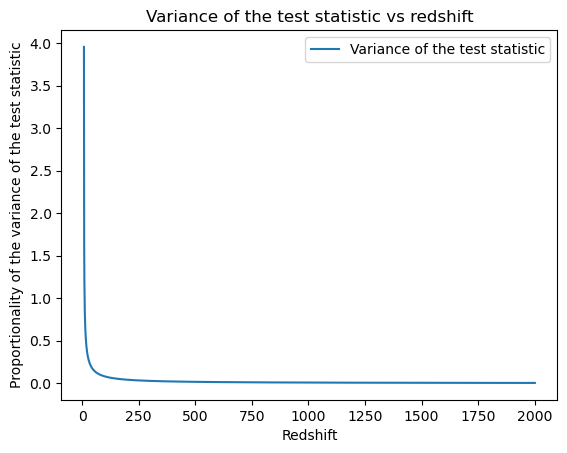

In [15]:
# Scaling of the variance of the test statistic

# The variance of the test statistic
s_n = 1 / np.sqrt(n_horizon_spheres-1)

# Plot
plt.plot(z, s_n, label='Variance of the test statistic')
plt.legend(loc='best')
plt.xlabel('Redshift')
plt.ylabel('Proportionality of the variance of the test statistic')
plt.title('Variance of the test statistic vs redshift')
plt.show()
